# Model 1: Logistic Regression

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Importing the necessary packages
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MultipleLocator
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data = pd.read_csv('heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data['FastingBS'] = data['FastingBS'].astype('object')
data['HeartDisease'] = data['HeartDisease'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 86.2+ KB


In [6]:
data.drop(data.loc[data['RestingBP']==0].index, inplace=True)
data.drop(data.loc[data['Cholesterol']==0].index, inplace=True)
data.reset_index(drop=True, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    object 
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 70.1+ KB


Remove all the rows with cholesterol = 0 and resting blood pressure = 0.   
When blood pressure goes to zero, it indicates complete failure of the circulatory system which means the person is dead.   
It is not possible for cholesterol to be zero in the human body.

In [7]:
np.random.seed(50)

## One Hot Encoding

One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy.   

Encoding is required because logistic regression can only take in numerical values.

We encode 6 categorical variables into its numeric values which are sex, chest pain type, fasting blood sugar, resting electrocardiogram results, exercise induced angina and the slope of the peak exercise ST segment.

In [8]:
ohe = OneHotEncoder()

data_cat = data[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns = ohe.get_feature_names_out(data_cat.columns))

In [9]:
data_cat_ohe.info()
data_cat_ohe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex_F              746 non-null    float64
 1   Sex_M              746 non-null    float64
 2   ChestPainType_ASY  746 non-null    float64
 3   ChestPainType_ATA  746 non-null    float64
 4   ChestPainType_NAP  746 non-null    float64
 5   ChestPainType_TA   746 non-null    float64
 6   FastingBS_0        746 non-null    float64
 7   FastingBS_1        746 non-null    float64
 8   RestingECG_LVH     746 non-null    float64
 9   RestingECG_Normal  746 non-null    float64
 10  RestingECG_ST      746 non-null    float64
 11  ExerciseAngina_N   746 non-null    float64
 12  ExerciseAngina_Y   746 non-null    float64
 13  ST_Slope_Down      746 non-null    float64
 14  ST_Slope_Flat      746 non-null    float64
 15  ST_Slope_Up        746 non-null    float64
dtypes: float64(16)
memory usag

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
# Combining Numeric features with the OHE Categorical features
data_num = data[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]
data_res = data['HeartDisease']
data_ohe = pd.concat([data_num, data_cat_ohe, data_res], 
                           sort = False, axis = 1).reindex(index=data_num.index)

data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   MaxHR              746 non-null    int64  
 4   Oldpeak            746 non-null    float64
 5   Sex_F              746 non-null    float64
 6   Sex_M              746 non-null    float64
 7   ChestPainType_ASY  746 non-null    float64
 8   ChestPainType_ATA  746 non-null    float64
 9   ChestPainType_NAP  746 non-null    float64
 10  ChestPainType_TA   746 non-null    float64
 11  FastingBS_0        746 non-null    float64
 12  FastingBS_1        746 non-null    float64
 13  RestingECG_LVH     746 non-null    float64
 14  RestingECG_Normal  746 non-null    float64
 15  RestingECG_ST      746 non-null    float64
 16  ExerciseAngina_N   746 non

In [11]:
data_ohe = data_ohe.fillna(0) # fill in all NaN values with zero
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   MaxHR              746 non-null    int64  
 4   Oldpeak            746 non-null    float64
 5   Sex_F              746 non-null    float64
 6   Sex_M              746 non-null    float64
 7   ChestPainType_ASY  746 non-null    float64
 8   ChestPainType_ATA  746 non-null    float64
 9   ChestPainType_NAP  746 non-null    float64
 10  ChestPainType_TA   746 non-null    float64
 11  FastingBS_0        746 non-null    float64
 12  FastingBS_1        746 non-null    float64
 13  RestingECG_LVH     746 non-null    float64
 14  RestingECG_Normal  746 non-null    float64
 15  RestingECG_ST      746 non-null    float64
 16  ExerciseAngina_N   746 non

In [12]:
y = pd.DataFrame(data_ohe['HeartDisease']) # response variable
X = pd.DataFrame(data_ohe.drop('HeartDisease', axis = 1)) # predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

params_lr = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'penalty': ['l1','l2','None'],
}

gridCV = GridSearchCV(LogisticRegression(), param_grid = params_lr, scoring = 'f1')

gridCV.fit(X_train, y_train)

print(gridCV.best_params_)

{'C': 10, 'penalty': 'l2'}


C and penalty are hyperparameters that control the strength of the regularization, so it will penalize the extreme values in the train dataset to avoid overfitting.  

We found that the best C value to use here is 10 and penalty is 'l2' Ridge.

Ridge regression specifically corrects for multicollinearity (two or more independent variables in a regression model are highly correlated with each other) in regression analysis.

In [13]:
# instantiate the model (using the optimal parameters)
logreg = LogisticRegression(C = 10, penalty='l2')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred1 = logreg.predict(X_train)

Logistic Regression
Train Data
Accuracy:  0.8601532567049809
F1 score:  0.8588007736943907

Test Data
Accuracy:  0.8794642857142857
F1 score:  0.8720379146919431

TPR Test:  0.92
TNR Test:  0.8467741935483871

FPR Test:  0.1532258064516129
FNR Test:  0.08


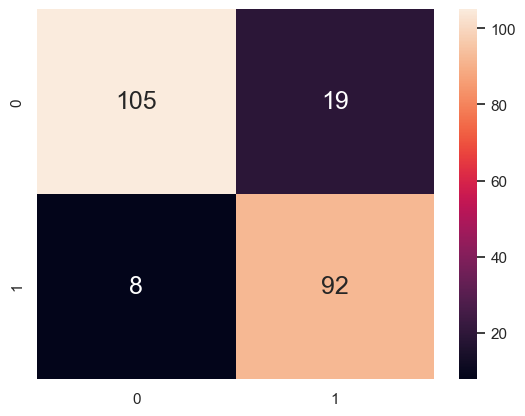

In [14]:
# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("Logistic Regression")
print("Train Data")
print("Accuracy: ", accuracy_score(y_train, y_pred1))
print("F1 score: ", f1_score(y_train,y_pred1))
print()
print("Test Data")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test,y_pred))
print()
print("TPR Test: ", (tpTest/(tpTest + fnTest)))
print("TNR Test: ", (tnTest/(tnTest + fpTest)))
print()
print("FPR Test: ", (fpTest/(tnTest + fpTest)))
print("FNR Test: ", (fnTest/(tpTest + fnTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

The accuracy of the model is generally high for the test datasets with `0.8794642857142857`

The F1 score is calculated as the mean of the precision and recall scores. Precision is about minimizing the number of false positives, while recall is about maximizing the number of true positives.

The F1 score calculated for the test dataset is considered good with `0.8720379146919431` where the number of false positives (those without heart disease but incorrectly diagonsed with heart disease) is minimised while the number true positives (those with heart disease and correctly diagonsed with heart disease) is maximised. 

In [15]:
target_names = ['no heart disease', 'heart disease']
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

no heart disease       0.93      0.85      0.89       124
   heart disease       0.83      0.92      0.87       100

        accuracy                           0.88       224
       macro avg       0.88      0.88      0.88       224
    weighted avg       0.88      0.88      0.88       224



Precision:

Out of all those predicted as "no heart disease", 93% of them actually have "no heart disease".   
Out of all those predicted as "heart disease", 83% of them actually have "heart disease".

Recall: The model correctly identities 85% of instances of "no heart disease" and 92% of the instances of "heart disease".

F1-score: The weighted average of precision and recall

Support: 124 instances of "no heart disease" in the test dataset and 100 instances of "heart disease"  in the test dataset.

Macro average: The average of precision, recall and F1-score respectively without taking into account of class imbalance.

Weighted average: The weighted average of precision, recall and F1-score respectively by taking into account of class imbalance.

Both macro and weighted average are the same, which suggests there is no class imbalance issue in the dataset.

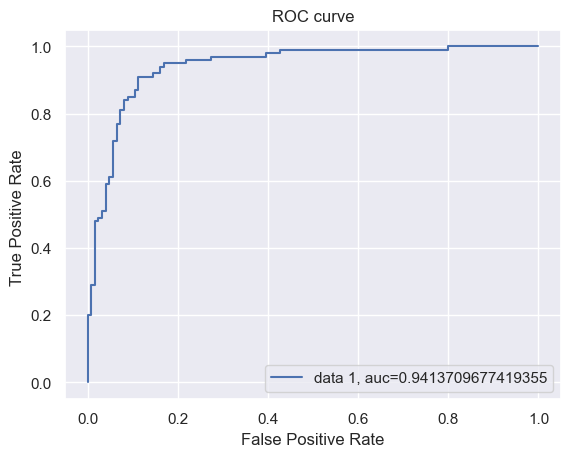

In [16]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label = "data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate ")
plt.show()

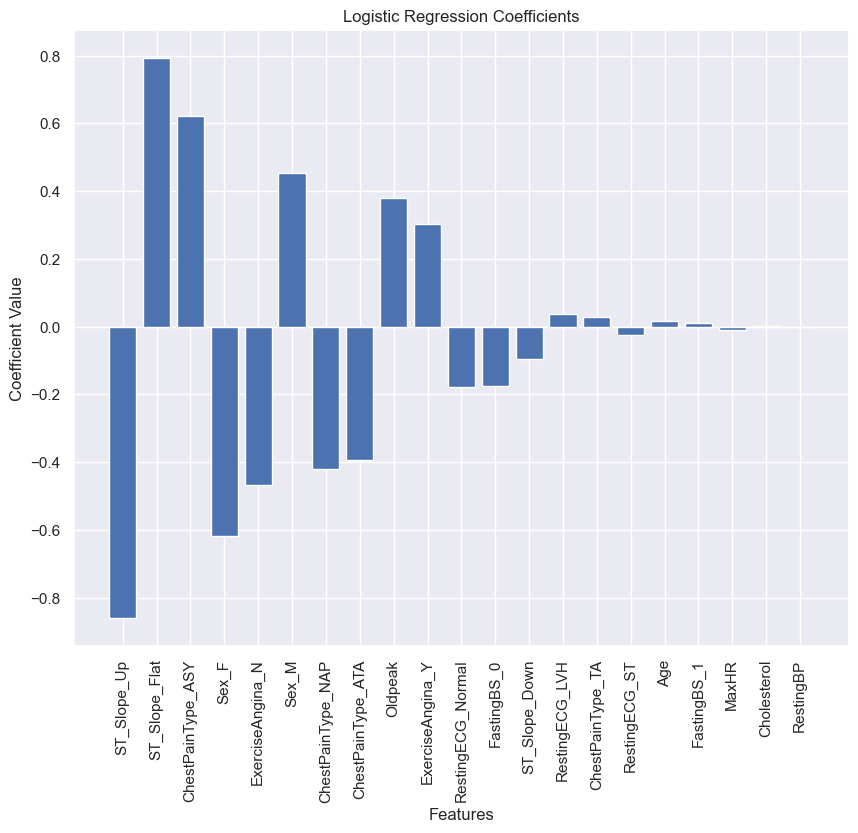

In [17]:
lr = LogisticRegression(C = 0.1,penalty = 'l2')
lr.fit(X_train, y_train)

# Get feature coefficients
coef = lr.coef_[0]

# Sort coefficients in descending order and get feature names
features = X.columns
coef_dict = {feat: coef for feat, coef in zip(features, coef)}
sorted_coef_dict = dict(sorted(coef_dict.items(), key=lambda x: -abs(x[1])))

plt.figure(figsize=(10,8))
plt.bar(sorted_coef_dict.keys(), sorted_coef_dict.values())
plt.xticks(rotation=90)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.gca().yaxis.set_major_locator(MultipleLocator(0.2))
plt.show()

The higher the coefficient value, the stronger the variable is related to having heart disease.

From the plot, ST_Slope_Up is the most inversely related to heart disease with a coefficient value of roughly 0.88, followed by ST_Slope_Flat is second most linearly related to heart disease with a coefficient value of roughly 0.79, the third most variable which linearly related to heart disease is ChestPainTyoe_ASY with a coefficient value of roughly 0.62.

### Conclusion

The accuaracy of the model on test dataset is `0.8794642857142857`

The top 3 variables related to heart disease is `ST_Slope_Up`, followed by `ST__Slope_Flat`, and lastly `ChestPainType_ASY`.